## ITM390: Machine Learning
## Final Project
### Implemented by: HOUR Seth Tharo, TAING Soonly, MONG Chanrattnak
The script loads labeled face images, preprocesses them, trains a machine learning model, evaluates its performance, and finally tests the model on new images. The specific dataset used is Labeled Faces in the Wild (LFW), and the script provides a comprehensive pipeline for facial recognition using machine learning.

##### Import Necessary Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

##### Loading labeled face images for training the model
Loads images from the specified folder path, detects labels from subfolder names, and returns a list of image data and corresponding labels.

In [2]:
def load_lfw_images(folder_path):
    image_data = []
    labels = []
    for root, dirs, files in os.walk(folder_path):
        if len(files) >= 20:
            for file in files:
                file_path = os.path.join(root, file)
                label = os.path.basename(root)
                image_data.append((cv2.imread(file_path, cv2.IMREAD_GRAYSCALE), label))
                labels.append(label)
    return image_data, labels

##### Preprocessing step to focus on facial features
Uses Haar cascades to detect faces in the input image and returns a cropped and resized face image.

In [3]:
def detect_and_crop_face(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    if len(faces) > 0:
        x, y, w, h = faces[0]
        face = image[y:y + h, x:x + w]
        return cv2.resize(face, (128, 128))
    else:
        return None

##### Ensuring consistent feature scaling for the machine learning model
Applies Standard Scaling to normalize the pixel values of the face images.

In [4]:
def normalize_images(faces):
    scaler = StandardScaler()
    faces_normalized = scaler.fit_transform(faces)
    return faces_normalized, scaler

##### Increasing the diversity of the training data to improve model generalization
Flips the input image horizontally for data augmentation.

In [5]:
def apply_data_augmentation(image):
    # Flip horizontally for data augmentation
    return cv2.flip(image, 1)

##### Reducing the feature space while preserving important information
Applies Principal Component Analysis (PCA) to reduce dimensionality and extract features from normalized faces.

In [6]:
def extract_features(faces_normalized, n_components):
    pca = PCA(n_components=n_components)
    features = pca.fit_transform(faces_normalized)
    return features, pca

##### Building a model for face recognition
Trains a Support Vector Machine (SVM) classifier using the input features and labels

In [7]:
def train_svm(features, labels):
    clf = SVC()
    clf.fit(features, labels)
    return clf

##### Assessing the performance of the trained model
Evaluates the SVM model using various metrics and displays a confusion matrix.

In [8]:
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    # Generate and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

##### Preprocessing an image before making predictions
Applies face detection, normalization, and PCA transformation to a single input image.

In [9]:
def preprocess_image(img, scaler, pca):
    face = detect_and_crop_face(img)
    if face is not None:
        flattened_face = face.flatten()
        normalized_face = scaler.transform([flattened_face])
        # Apply PCA transformation
        transformed_face = pca.transform(normalized_face)
        return transformed_face
    else:
        return None

##### Making predictions on new images
Predicts the label of a normalized face using the trained SVM model.

In [10]:
def predict_label(model, normalized_face):
    if normalized_face is not None:
        prediction = model.predict(normalized_face)
        return prediction[0]
    else:
        return None

##### Checking the model's performance on new data
Tests the trained model on images from the specified folder, displaying the input image along with the predicted label.

In [11]:
def test_model_on_images(model, scaler, pca, image_folder):
    for root, dirs, files in os.walk(image_folder):
        for file in files:
            file_path = os.path.join(root, file)
            input_image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            display_image = cv2.imread(file_path, cv2.IMREAD_COLOR)
            display_image_rgb = cv2.cvtColor(display_image, cv2.COLOR_BGR2RGB) # Convert BGR to RGB before displaying the image
            normalized_face = preprocess_image(input_image, scaler, pca)
            
            if normalized_face is not None:
                label = predict_label(model, normalized_face)
                if label is not None:
                    # Display the input image
                    plt.imshow(display_image_rgb)
                    plt.title(f"Image: {file_path}, Predicted Label: {label}")
                    plt.show()

                else:
                    plt.imshow(display_image_rgb)
                    plt.title(f"Image: {file_path}, No Label Found")
                    plt.show()
            else:
                plt.imshow(display_image_rgb)
                plt.title(f"Image: {file_path}, No Face Detected")
                plt.show()

##### Executing the entire facial recognition pipeline
The main function that orchestrates the entire process, from loading images to training the model and testing it on new images.

Step 1: Loaded 3023 images from C:\Users\Admin\Virtual Machine\Final Project\my_virtual_env\lfw_funneled
Step 2: Detected and cropped faces for 6018 images
Step 3: Normalized images successfully
Step 4: Feature extraction using PCA with 1000 components completed
Step 5: SVM classifier trained
Step 6: Model evaluation
Accuracy: 0.82
Precision: 0.88
Recall: 0.82
F1 Score: 0.81


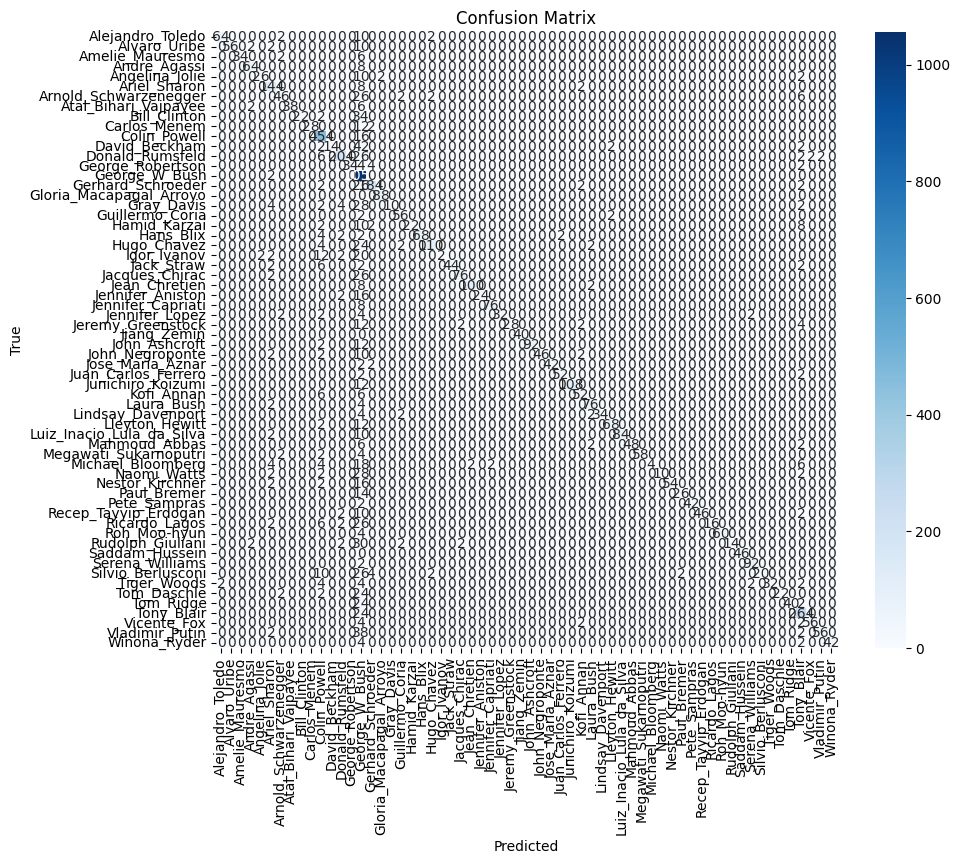

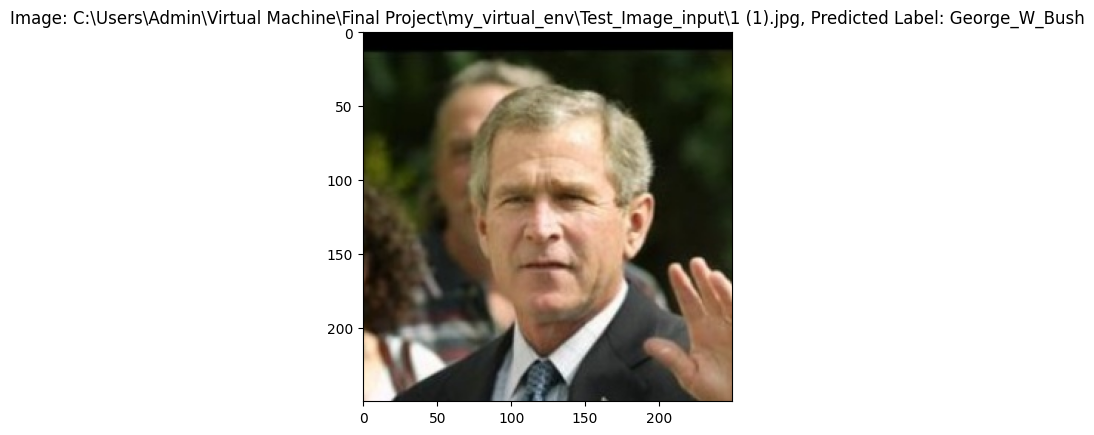

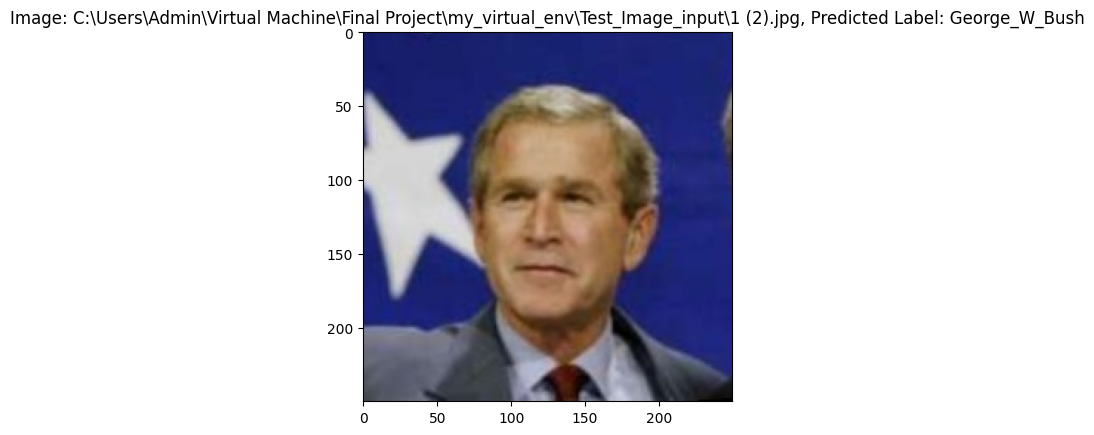

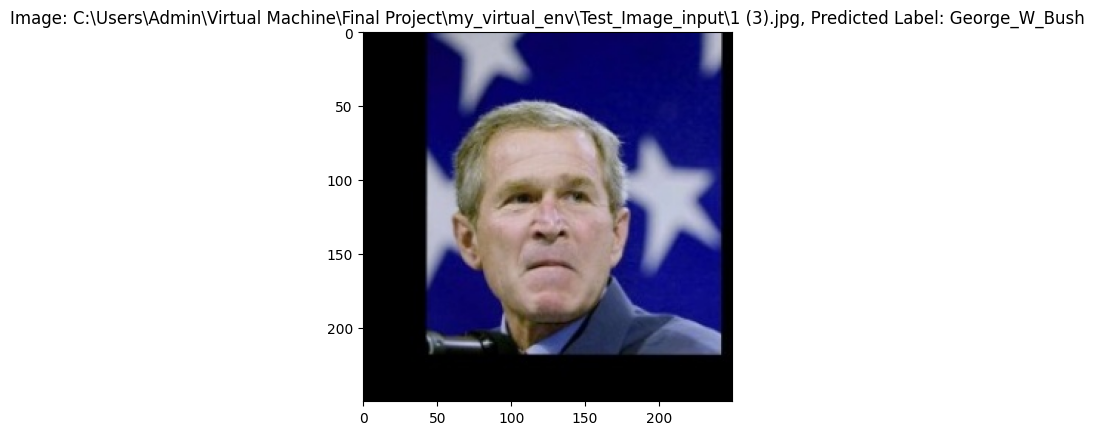

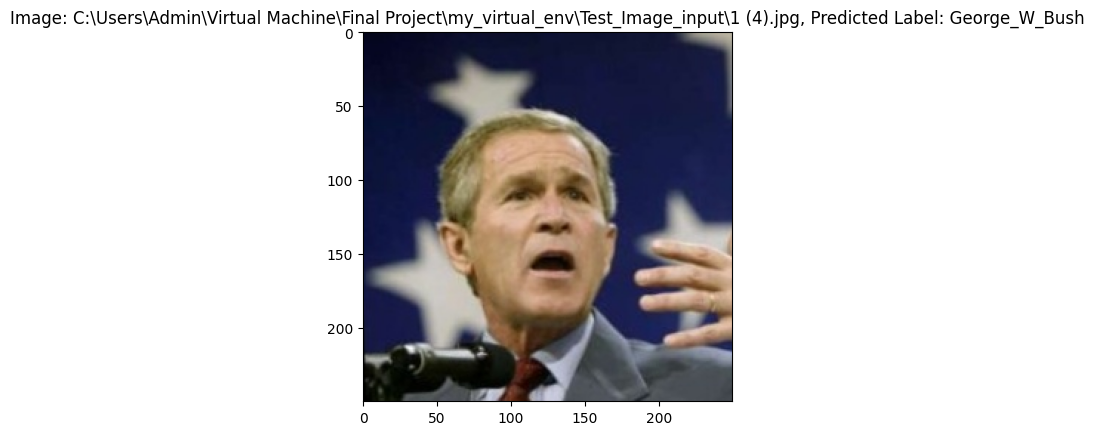

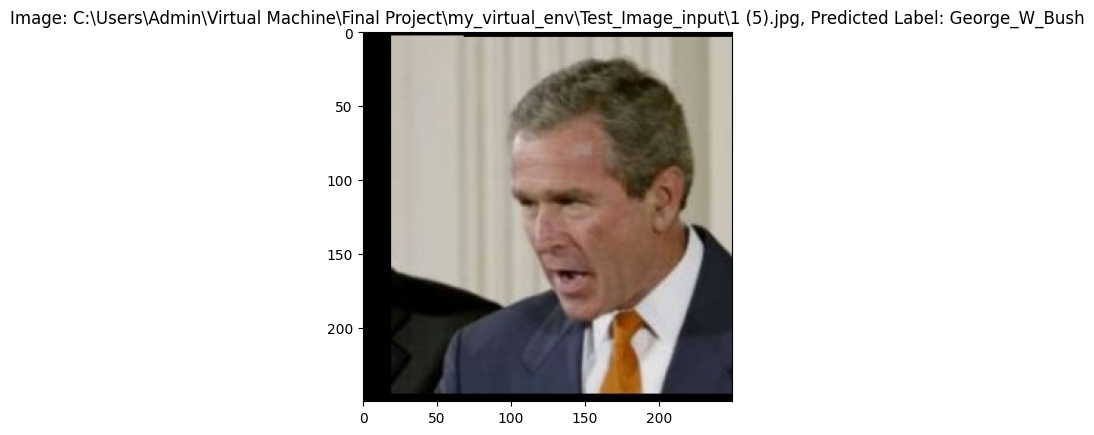

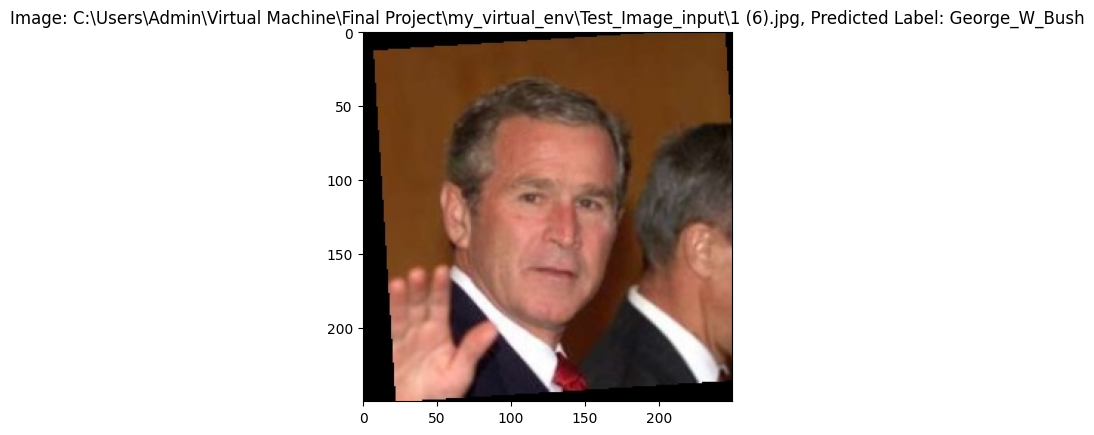

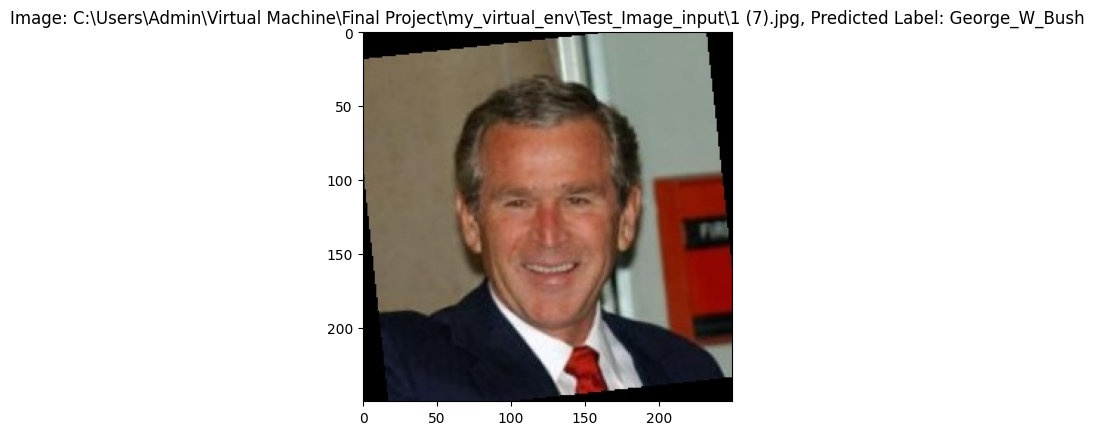

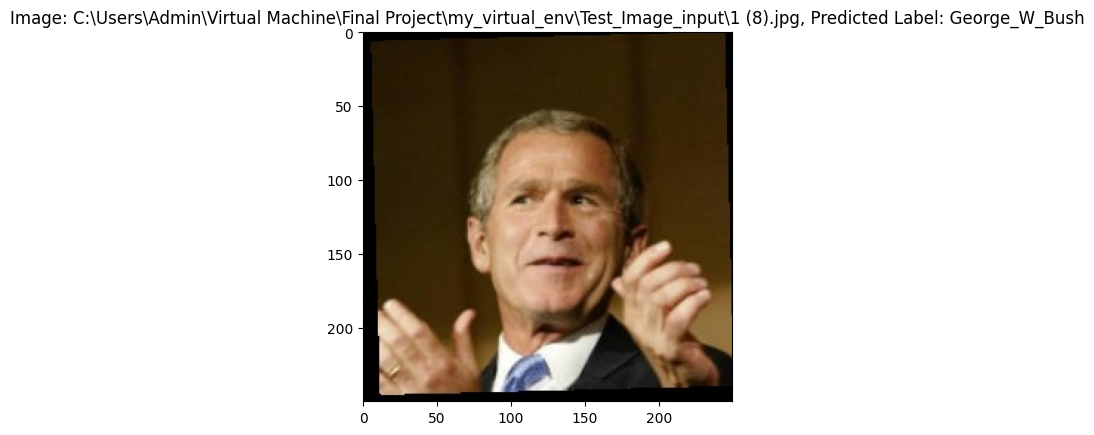

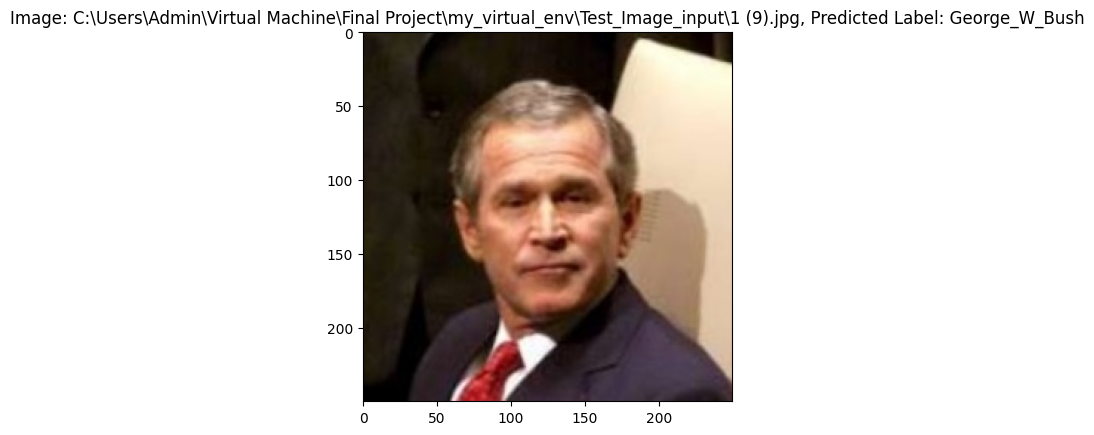

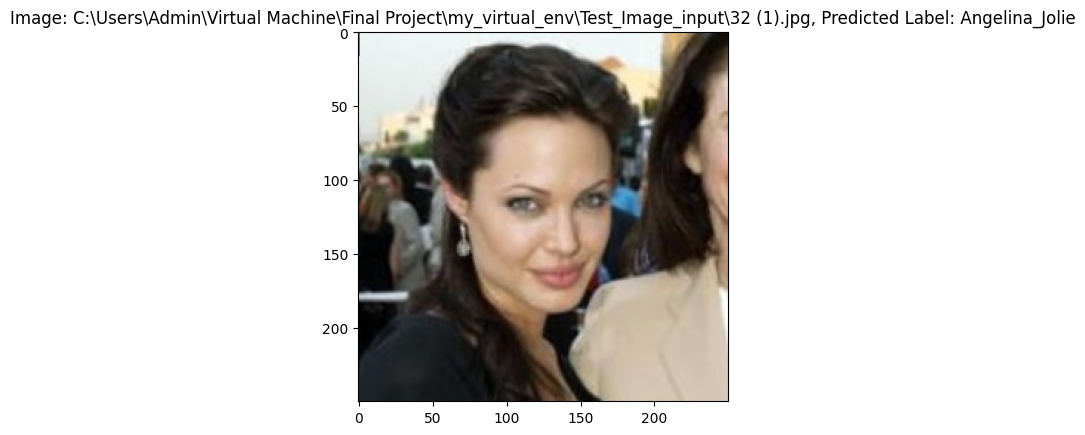

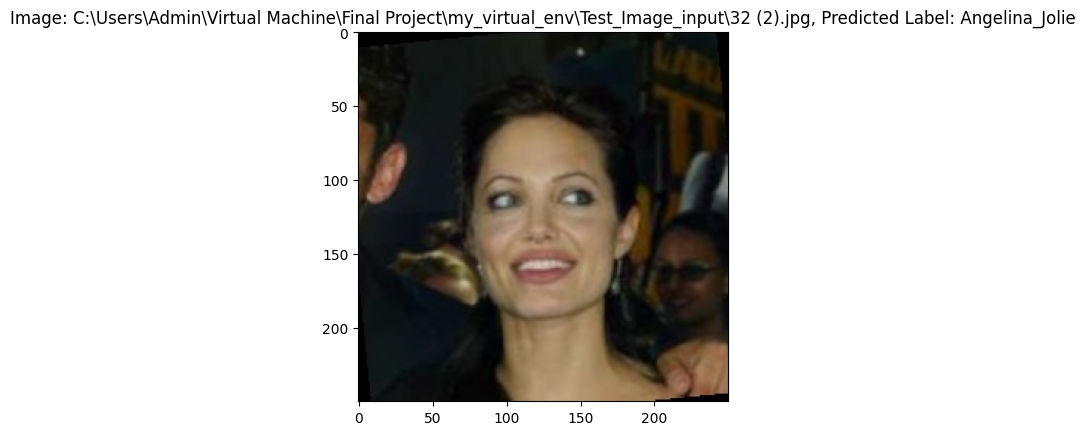

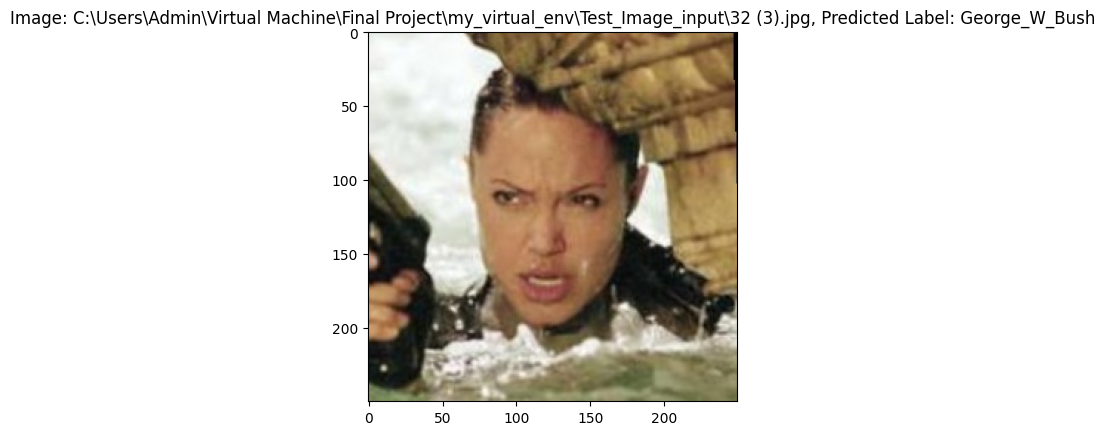

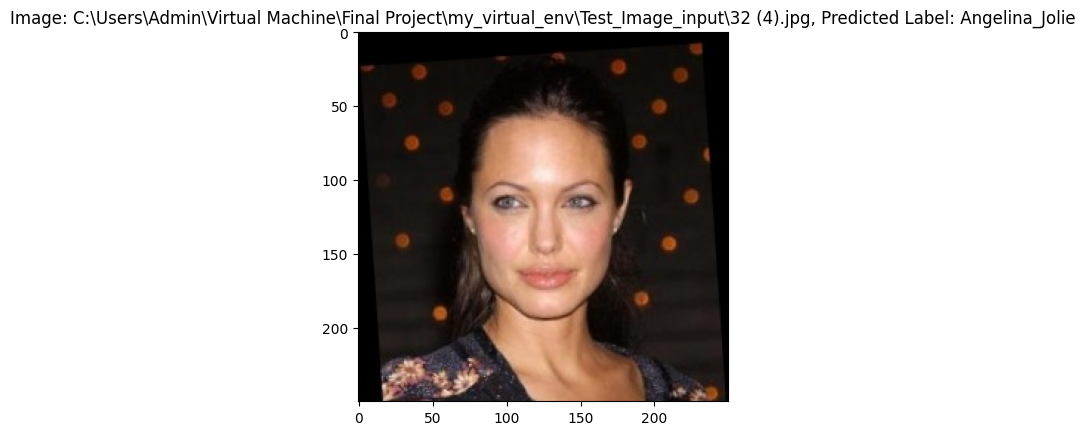

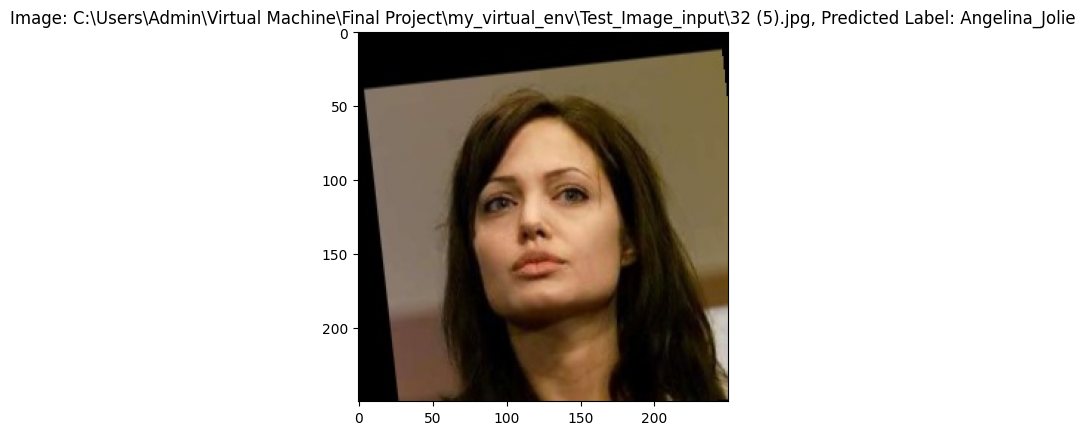

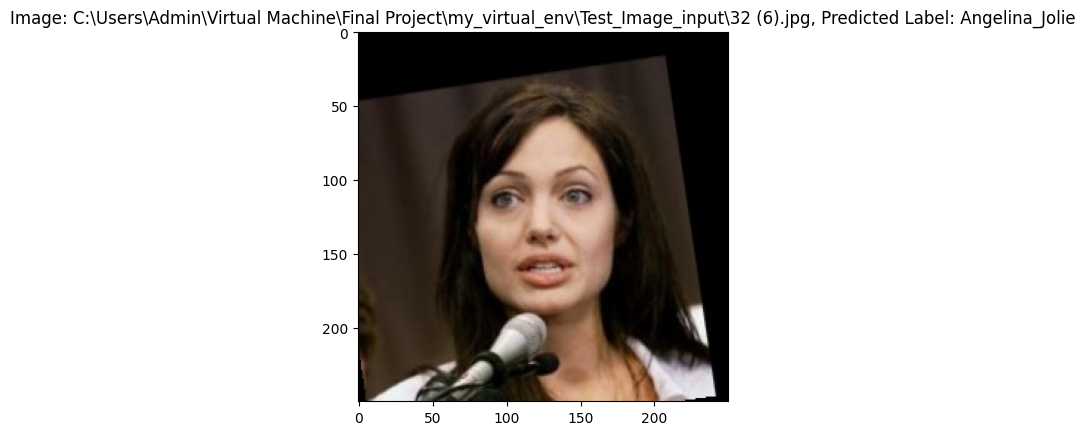

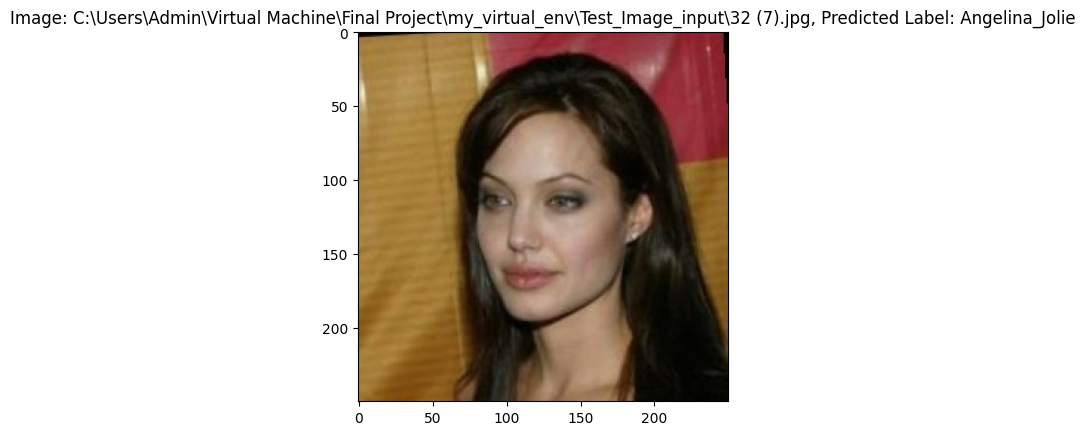

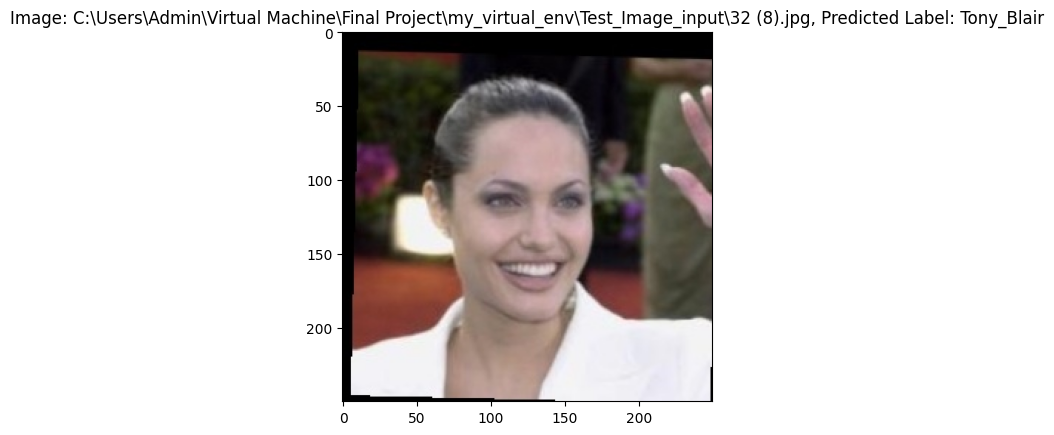

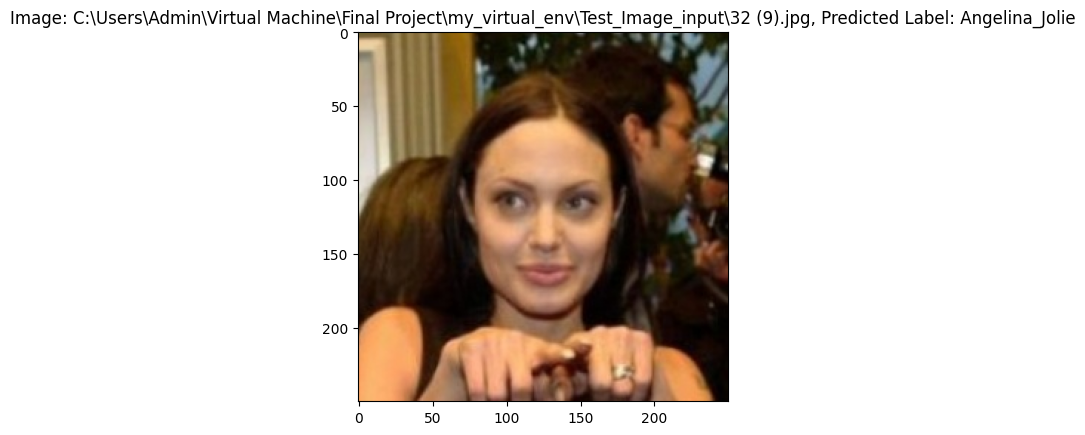

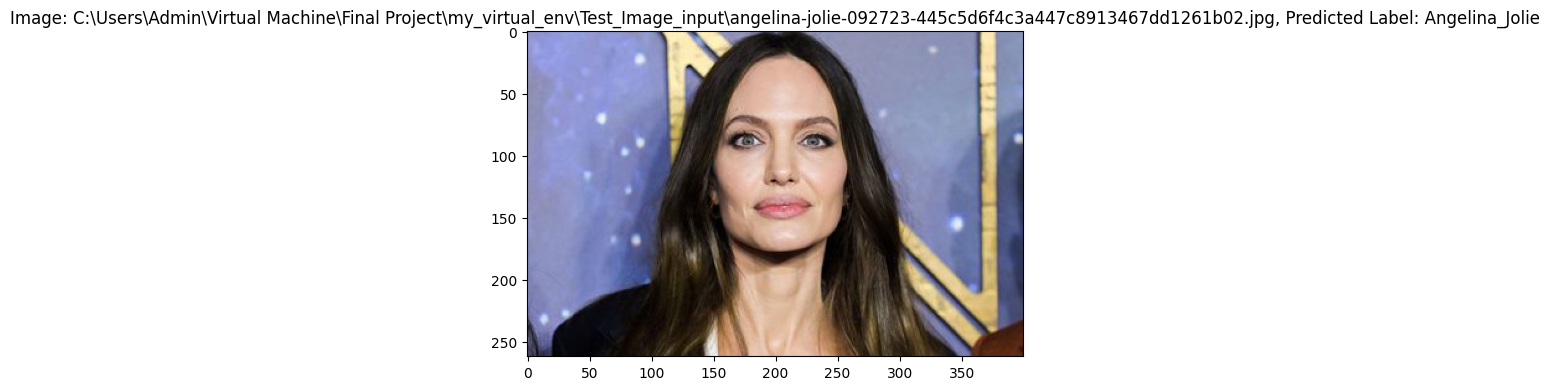

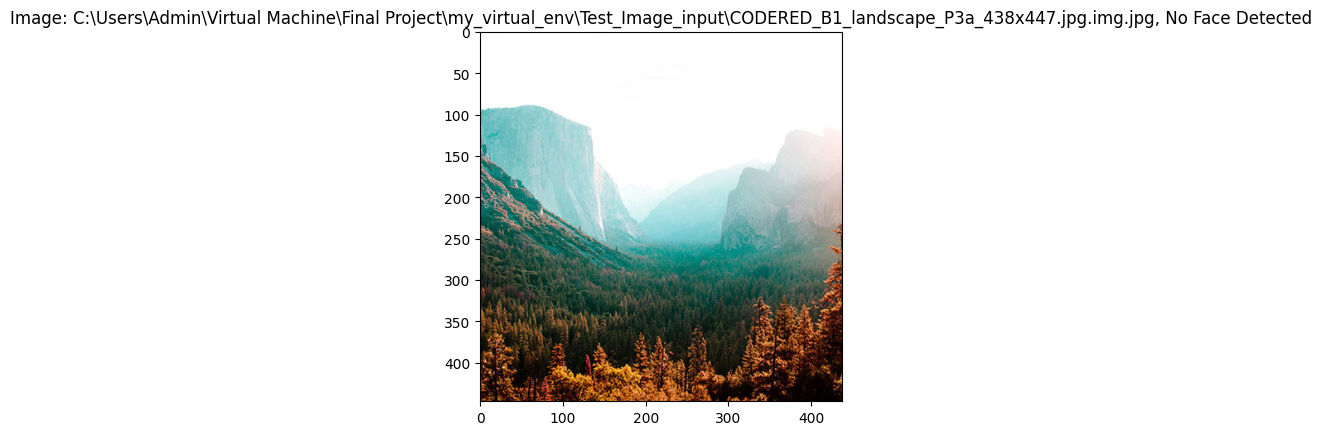

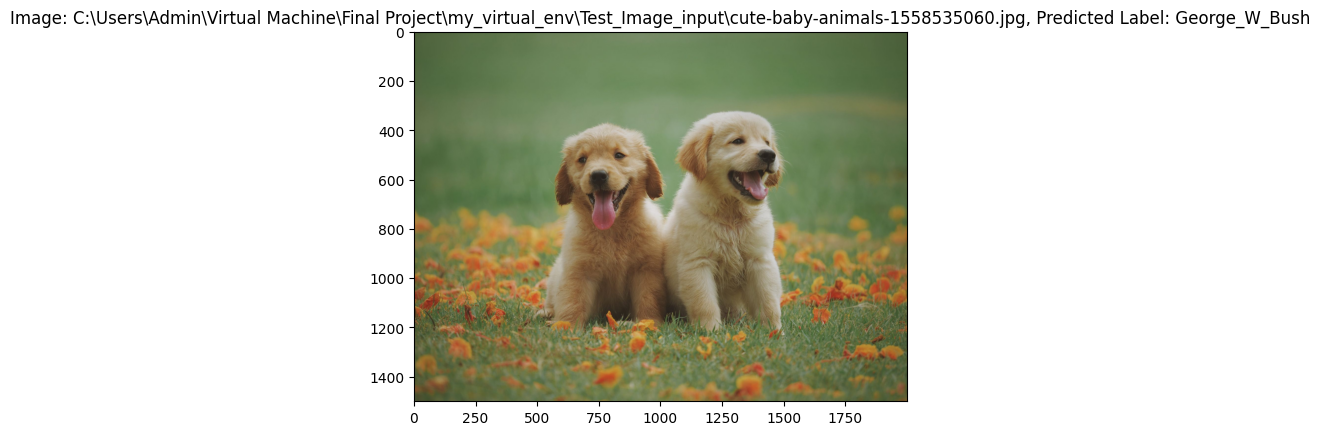

In [12]:
def main():
    # Step 1: Load LFW images
    folder_path = r"C:\Users\Admin\Virtual Machine\Final Project\my_virtual_env\lfw_funneled"
    image_data, all_labels = load_lfw_images(folder_path)
    print(f"Step 1: Loaded {len(image_data)} images from {folder_path}")
    
    # Step 2: Preprocess images
    faces = []
    face_labels = []  # Create a separate list for labels corresponding to detected faces
    for img, label in image_data:
        face = detect_and_crop_face(img)
        if face is not None:
            # Apply data augmentation
            augmented_face = apply_data_augmentation(face)
            faces.append(face.flatten())
            faces.append(augmented_face.flatten())  # Add augmented face to the dataset
            face_labels.extend([label, label])  # Add corresponding labels
    
    print(f"Step 2: Detected and cropped faces for {len(faces)} images")
    
    # Check the number of samples before feature extraction
    if len(faces) != len(face_labels):
        print("Error: Inconsistent number of samples in faces and face_labels.")
        print(f"Number of samples in faces: {len(faces)}")
        print(f"Number of samples in face_labels: {len(face_labels)}")
        return None, None, None, None, None
    
    # Step 3: Normalize images
    faces_normalized, scaler = normalize_images(faces)
    print("Step 3: Normalized images successfully")
    
    # Check the number of samples before feature extractionA
    if len(faces_normalized) != len(face_labels):
        print("Error: Inconsistent number of samples in faces_normalized and face_labels.")
        print(f"Number of samples in faces_normalized: {len(faces_normalized)}")
        print(f"Number of samples in face_labels: {len(face_labels)}")
        return None, None, None, None, None
    
    # Step 4: Feature extraction using PCA
    n_components = 1000  # Set the desired number of components
    features, pca = extract_features(faces_normalized, n_components)
    print(f"Step 4: Feature extraction using PCA with {n_components} components completed")
    
    # Step 5: Train SVM classifier
    clf = train_svm(features, face_labels)
    print("Step 5: SVM classifier trained")
    
    # Step 6: Evaluate the model
    y_test = np.array(face_labels)
    y_pred = clf.predict(features)
    print("Step 6: Model evaluation")
    evaluate_model(y_test, y_pred)

    # Return necessary values
    return faces_normalized, face_labels, scaler, clf, image_data, pca

if __name__ == "__main__":
    faces_normalized, face_labels, scaler, clf, image_data, pca = main()
    # Please input your image path here
    test_model_on_images(clf, scaler, pca, r"C:\Users\Admin\Virtual Machine\Final Project\my_virtual_env\Test_Image_input")